## Data Loading


In [1]:
import pandas as pd

model_data = pd.read_csv("../data/model-data/dataset2.csv")


# Modeling Tasks


## Split


In [ ]:
y = model_data.label.tolist()
X = model_data.msg_cased.tolist()
len(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True, stratify=y
)

X = X_test
y = y_test

X_test, X_validation, y_test, y_validation = train_test_split(
    X, y, test_size=0.50, random_state=42, shuffle=True, stratify=y
)

train = {"label": y_train, "msg": X_train}
test = {"label": y_test, "msg": X_test}
validation = {"label": y_validation, "msg": X_validation}


In [ ]:
# pd.DataFrame.from_dict(train).to_csv("../data/dataset/train2.csv", index=False)
# pd.DataFrame.from_dict(test).to_csv("../data/dataset/test2.csv", index=False)
# pd.DataFrame.from_dict(validation).to_csv("../data/dataset/validation2.csv", index=False)


## Loading Model and Tokenizer


In [2]:
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification

pretrained = "../models/finetuned_model"
tokenizer = AutoTokenizer.from_pretrained(
    pretrained, padding="max_length", truncation=True, return_tensors="pt"
)
model = AutoModelForSequenceClassification.from_pretrained(pretrained, num_labels=2).to("cuda:0")
# model = AutoModel.from_pretrained(pretrained).to("cuda:0")


In [3]:
train = pd.read_csv("../data/dataset/train.csv")
test = pd.read_csv("../data/dataset/test.csv")
validation = pd.read_csv("../data/dataset/validation.csv")


## Tokenize and Dataset Loading


In [5]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train)
test_dataset = Dataset.from_dict(test)
validation_dataset = Dataset.from_dict(validation)


In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples["msg"],
        padding="max_length",
        truncation="longest_first",
        max_length=128,
        return_tensors="pt",
    ).to("cuda")


In [ ]:
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True).shuffle(
    seed=100
)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True).shuffle(
    seed=100
)
tokenized_validation_dataset = validation_dataset.map(
    tokenize_function, batched=True
).shuffle(seed=100)


## Modeling


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")


In [ ]:
from transformers import TrainingArguments, Trainer
import numpy as np
import evaluate

training_args = TrainingArguments(
    output_dir="test_trainer", evaluation_strategy="epoch"
)

metric = evaluate.load("accuracy")


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validation_dataset,
    compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()


In [ ]:
trainer.save_model("roberta-tagalog-base-sent")


# Inference


In [4]:
from transformers import pipeline


classifier = pipeline(
    "sentiment-analysis",
    model=pretrained,
    tokenizer=tokenizer,
    device=0,
)


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [5]:
pred = classifier(validation.text.tolist())

# validation["label"] = validation["0"].replace({1: 2})
# validation["label"] = validation.apply(lambda x: x["label"] + x["1"], axis=1).replace({1: 3})
# validation["label"] = validation.apply(lambda x: x["label"] + x["2"], axis=1).replace({1: 4})
# validation["label"] = validation.apply(lambda x: x["label"] + x["3"], axis=1).replace({1: 5})
# validation["label"] = validation.apply(lambda x: x["label"] + x["4"], axis=1).replace({1: 6})

# validation["label"] = validation["label"].apply(lambda x: x - 2)


In [6]:

y_true = validation.label.tolist()
y_pred = []

y_true


[1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [ ]:
# train.drop(columns=["0", "1", "2", "3", "4"]).to_csv(
#     "../data/dataset/train-combine.csv", index=False
# )
# test.drop(columns=["0", "1", "2", "3", "4"]).to_csv(
#     "../data/dataset/test-combine.csv", index=False
# )
# validation.drop(columns=["0", "1", "2", "3", "4"]).to_csv(
#     "../data/dataset/validation-combine.csv", index=False
# )


In [ ]:
# train["label"] = train["0"].replace({1: 2})
# train["label"] = train.apply(lambda x: x["label"] + x["1"], axis=1).replace({1: 3})
# train["label"] = train.apply(lambda x: x["label"] + x["2"], axis=1).replace({1: 4})
# train["label"] = train.apply(lambda x: x["label"] + x["3"], axis=1).replace({1: 5})
# train["label"] = train.apply(lambda x: x["label"] + x["4"], axis=1).replace({1: 6})

# train["label"] = train["label"].apply(lambda x: x - 2)

# y_true = train.label.tolist()


In [7]:
for i in pred:
    y_pred.append(int(i["label"][-1]))

print(f"{len(y_true)} : pred {len(y_pred)}")


6000 : pred 6000


In [8]:
pred


[{'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score

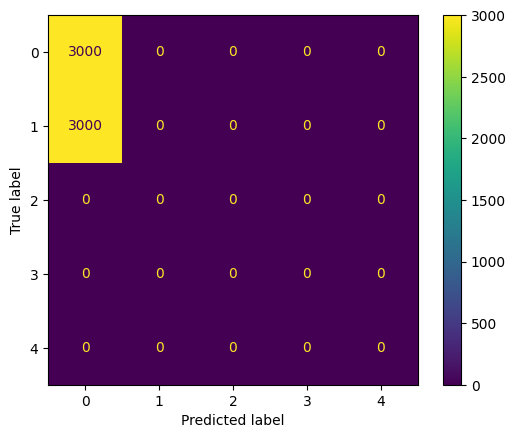

Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 score: 0.3333333333333333


c:\Users\Neilc\dev\proj\nlp-thesis-xlnet-tagalog\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

# Compute the accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Compute the precision
prec = precision_score(y_true, y_pred, average="macro")
print("Precision:", prec)

# Compute the recall
rec = recall_score(y_true, y_pred, average="macro")
print("Recall:", rec)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average="macro")
print("F1 score:", f1)

# # Compute the log-loss
# ll = log_loss(y_true, y_pred, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(y_true, y_pred, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)


In [ ]:
pred


In [ ]:
import torch

s1 = "Ayon sa mga respondents, nahihirapan daw ang pag-rescue sa mga biktima dahil sa flash flood."
s2 = "Kumuha ng tulong ang respondents sa Philippine Red Cross para sa mga lifeboat."
tokens = tokenizer(
    X_test,
    padding="max_length",
    truncation="longest_first",
    max_length=128,
    return_tensors="pt",
).to("cuda")

with torch.no_grad():
    out = model(**tokens)[0]


In [ ]:
out.argmax(1).item()


In [ ]:
from transformers import pipeline
import torch

with torch.no_grad():
    out = model(**tokenized_validation_dataset[0])[0]


In [ ]:
from transformers import (
    XLNetTokenizer,
    XLNetForSequenceClassification,
    AdamW,
    XLNetConfig,
    get_linear_schedule_with_warmup,
)


## Training


In [ ]:
from transformers import pipeline


In [ ]:
classifier3 = pipeline(
    "sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english"
)


In [ ]:
classifier4 = pipeline("text-classification", model="jcblaise/roberta-tagalog-large")


In [ ]:
classifier2 = pipeline(
    "sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment"
)


In [ ]:
classifier = pipeline(model="jcblaise/roberta-tagalog-base")


In [ ]:
classifier4(
    """
           XL ORDER KO HINDI SMALL AT NAVY BLUE ORDER KO HINDI MAROON NOT RECOMENDED SELLER WA KAYO BIBILI DITO Hindi nasunod kulay na order ko Hindi nasunod kulay na order ko Hindi nasunod kulay na order ko Hindi nasunod kulay na order ko Hindi nasunod kulay na order ko Hindi nasunod kulay na order ko
"""
)


In [ ]:
data[data.label == 1]


In [ ]:
data.msg_cased[37]
